In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
data_x = np.load('./Saves/data_x.npy')
data_y = np.load('./Saves/data_y.npy')

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, Y_train, Y_test = train_test_split( data_x, data_y, test_size = 0.2, random_state = 10 )
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [5]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5520, 32, 32, 3) (1380, 32, 32, 3) (5520, 6) (1380, 6)


In [7]:
np.unique(Y_train)

array([0., 1.], dtype=float32)

# CNN (Convolutional Neural Network)

## Sequential

In [6]:
from tensorflow.keras import layers 
from tensorflow.keras import models

In [60]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.ZeroPadding2D(input_shape = (32,32,3), padding=(3,3)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.BatchNormalization(axis = 3))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(6))
model.add(layers.Activation('softmax'))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 38, 38, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 36, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 36, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9

In [62]:
tf.keras.backend.clear_session()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10,validation_data=(X_test, Y_test), batch_size=10)

Epoch 1/10
552/552 [==============================] - 2s 4ms/step - loss: 0.6797 - accuracy: 0.7701 - val_loss: 1.0776 - val_accuracy: 0.6000
Epoch 2/10
552/552 [==============================] - 2s 3ms/step - loss: 0.2519 - accuracy: 0.9217 - val_loss: 0.4073 - val_accuracy: 0.8775
Epoch 3/10
552/552 [==============================] - 2s 3ms/step - loss: 0.1490 - accuracy: 0.9567 - val_loss: 0.2756 - val_accuracy: 0.9268
Epoch 4/10
552/552 [==============================] - 2s 3ms/step - loss: 0.0820 - accuracy: 0.9737 - val_loss: 0.3462 - val_accuracy: 0.9130
Epoch 5/10
552/552 [==============================] - 2s 3ms/step - loss: 0.1036 - accuracy: 0.9661 - val_loss: 0.4961 - val_accuracy: 0.8993
Epoch 6/10
552/552 [==============================] - 2s 3ms/step - loss: 0.1143 - accuracy: 0.9674 - val_loss: 0.3987 - val_accuracy: 0.9080
Epoch 7/10
552/552 [==============================] - 2s 4ms/step - loss: 0.0688 - accuracy: 0.9797 - val_loss: 0.5944 - val_accuracy: 0.8920
Epoch 

In [65]:
model.save('./Saves/Seq/')
model.save_weights('./Saves/Seq/')

INFO:tensorflow:Assets written to: ./Saves/Seq/assets


44/44 - 0s - loss: 0.4024 - accuracy: 0.9283


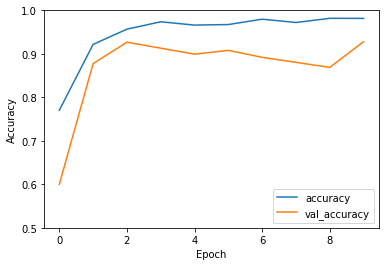

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

## Xception

In [5]:
data_x_xcept = np.load('./Saves/data_x_xcept.npy')
data_y_xcept = np.load('./Saves/data_y_xcept.npy')

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train_xcept, X_test_xcept, Y_train_xcept, Y_test_xcept = train_test_split( data_x_xcept, data_y_xcept, test_size = 0.2, random_state = 10 )
Y_train_xcept = to_categorical(Y_train_xcept)
Y_test_xcept = to_categorical(Y_test_xcept)

In [8]:
tf.keras.backend.clear_session()
model_Xcept= tf.keras.applications.Xception(input_shape =(224,224,3), weights= None, pooling = 'max',classes=6,classifier_activation='softmax')

In [9]:
model_Xcept.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [10]:
tf.keras.backend.clear_session()
model_Xcept.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_Xcept.fit(X_train_xcept, Y_train_xcept, epochs=10,validation_data=(X_test_xcept, Y_test_xcept), batch_size=10)

Epoch 1/10
552/552 [==============================] - 183s 332ms/step - loss: 0.8375 - accuracy: 0.7007 - val_loss: 1.3569 - val_accuracy: 0.5957
Epoch 2/10
552/552 [==============================] - 179s 324ms/step - loss: 0.3220 - accuracy: 0.8922 - val_loss: 0.1122 - val_accuracy: 0.9594
Epoch 3/10
552/552 [==============================] - 179s 325ms/step - loss: 0.1753 - accuracy: 0.9424 - val_loss: 0.3740 - val_accuracy: 0.8870
Epoch 4/10
552/552 [==============================] - 178s 323ms/step - loss: 0.1751 - accuracy: 0.9455 - val_loss: 0.6059 - val_accuracy: 0.8500
Epoch 5/10
552/552 [==============================] - 179s 324ms/step - loss: 0.1187 - accuracy: 0.9601 - val_loss: 0.4227 - val_accuracy: 0.8572
Epoch 6/10
552/552 [==============================] - 178s 322ms/step - loss: 0.1114 - accuracy: 0.9679 - val_loss: 0.0443 - val_accuracy: 0.9848
Epoch 7/10
552/552 [==============================] - 178s 322ms/step - loss: 0.0888 - accuracy: 0.9716 - val_loss: 0.6804 -

In [11]:
model_Xcept.save('./Saves/Xcept/')
model_Xcept.save_weights('./Saves/Xcept/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Saves/Xcept/assets


44/44 - 9s - loss: 0.0463 - accuracy: 0.9848


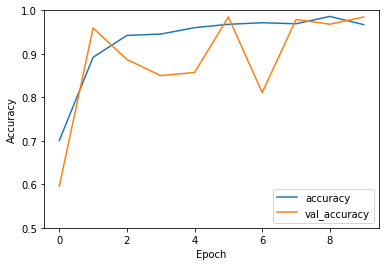

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_Xcept.evaluate(X_test_xcept,  Y_test_xcept, verbose=2)

## ResNet50

In [14]:
tf.keras.backend.clear_session()
model_ResNet50= tf.keras.applications.ResNet50(input_shape =(224,224,3), weights= None, pooling = 'max',classes=6,classifier_activation='softmax')

In [15]:
model_ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [16]:
tf.keras.backend.clear_session()
model_ResNet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_ResNet50.fit(X_train_xcept, Y_train_xcept, epochs=10,validation_data=(X_test_xcept, Y_test_xcept), batch_size=16)

Epoch 1/10
345/345 [==============================] - 117s 338ms/step - loss: 1.1873 - accuracy: 0.6036 - val_loss: 3.2935 - val_accuracy: 0.2696
Epoch 2/10
345/345 [==============================] - 115s 333ms/step - loss: 0.4969 - accuracy: 0.8379 - val_loss: 2.7552 - val_accuracy: 0.2087
Epoch 3/10
345/345 [==============================] - 115s 334ms/step - loss: 0.3432 - accuracy: 0.8886 - val_loss: 1.6981 - val_accuracy: 0.5674
Epoch 4/10
345/345 [==============================] - 115s 334ms/step - loss: 0.2630 - accuracy: 0.9190 - val_loss: 8.0680 - val_accuracy: 0.3457
Epoch 5/10
345/345 [==============================] - 115s 335ms/step - loss: 0.2058 - accuracy: 0.9351 - val_loss: 24.5402 - val_accuracy: 0.1746
Epoch 6/10
345/345 [==============================] - 115s 334ms/step - loss: 0.1903 - accuracy: 0.9377 - val_loss: 4.0642 - val_accuracy: 0.4725
Epoch 7/10
345/345 [==============================] - 115s 334ms/step - loss: 0.1470 - accuracy: 0.9527 - val_loss: 3.6743 

In [17]:
model_ResNet50.save('./Saves/Resnet/')
model_ResNet50.save_weights('./Saves/Resnet/')

INFO:tensorflow:Assets written to: ./Saves/Resnet/assets


44/44 - 7s - loss: 0.8624 - accuracy: 0.7935


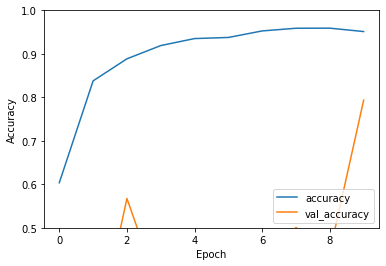

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_ResNet50.evaluate(X_test_xcept,  Y_test_xcept, verbose=2)

# Logistic Regression 

In [11]:
from sklearn import linear_model
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection
from sklearn import metrics

from sklearn.model_selection import train_test_split


d1, d2, d3, d4 = data_x.shape
data_x_reshaped = data_x.reshape((d1, d2*d3*d4))

X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(data_x_reshaped, data_y, test_size = 0.2, random_state = 17 )

log_reg = linear_model.LogisticRegression(max_iter = 1000)
ovo= OneVsOneClassifier(log_reg)
ovo.fit(X_train_a,np.ravel(Y_train_a))

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

In [12]:
with open("./Saves/logistic_save.sav", 'wb') as f:
    pickle.dump(ovo, f)

In [13]:
lor_predictions =ovo.predict(X_test_a)
lor_predictions

array([0, 5, 2, ..., 4, 1, 3])

In [14]:
lor_accuracy = ovo.score(X_test_a,Y_test_a)
lor_accuracy

0.9072463768115943

In [15]:
cm = metrics.confusion_matrix(Y_test_a, lor_predictions)
cm

array([[213,   2,  10,   2,   3,   2],
       [  2, 205,   1,   8,   1,  11],
       [  5,   0, 229,   4,   8,   2],
       [  3,   9,   3, 208,   0,   0],
       [  6,   3,  10,   1, 201,   4],
       [  8,   9,   2,   6,   3, 196]], dtype=int64)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
parameters_dtree = {'max_depth':[2,4,10],
                    'min_samples_split' : [2,3,4]}


In [17]:
gridstree = GridSearchCV(dtree,parameters_dtree,cv = 5)

In [18]:
gridstree.fit(X_train_a,np.ravel(Y_train_a))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 10],
                         'mi

In [19]:
gridstree.best_params_

{'max_depth': 10, 'min_samples_split': 3}

In [20]:
gridstree.best_score_

0.5976449275362319

In [21]:
dtree =  DecisionTreeClassifier(**gridstree.best_params_)
dtree.fit(X_train_a, np.ravel(Y_train_a))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
with open("./Saves/decision_save.sav", 'wb') as f:
    pickle.dump(dtree, f)

In [23]:
dtree_accuracy = dtree.score(X_test_a,Y_test_a)
print(dtree_accuracy)

0.6166666666666667


In [24]:
predictions_dtree = dtree.predict(X_test_a)

In [25]:
cm_dtree = metrics.confusion_matrix(predictions_dtree,Y_test_a)
print(cm_dtree)

[[148  16  13  14  12  11]
 [ 32 140  28  36  13  32]
 [ 17  17 152  26  29  17]
 [ 14  36  39 130  13  16]
 [  6   4   8   7 145  12]
 [ 15  15   8  10  13 136]]


## SVM (Support Vector Machine)

In [7]:
d1, d2, d3, d4 = data_x.shape 
data_x_reshaped = data_x.reshape((d1, d2*d3*d4))

In [16]:
from sklearn import metrics

In [8]:
from sklearn.model_selection import train_test_split

X_train_svm, X_test_svm, Y_train_svm, Y_test_svm = train_test_split(data_x_reshaped, data_y, test_size = 0.2, random_state = 25)

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()

parameters = {'C' : [0.1,0.5,1,5,10],
              'kernel' : ['linear', 'poly', 'rbf','sigmoid',],
              'tol' : [0.000,0.001,0.1]}

grids= GridSearchCV(svc,param_grid = parameters)

print(X_train_svm.shape)
print(Y_train_svm.shape)

(5520, 3072)
(5520, 1)


In [9]:
grids.fit(X_train_svm,np.ravel(Y_train_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: eps <= 0

  FitFailedWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.0, 0.001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
with open("./Saves/gcv.sav", 'wb') as f:
    pickle.dump(grids, f)

In [11]:
print(grids.best_params_)

print(grids.best_score_)

{'C': 10, 'kernel': 'rbf', 'tol': 0.1}
0.9190217391304347


In [12]:
svc= SVC(**grids.best_params_) 
svc.fit(X_train_svm,np.ravel(Y_train_svm))

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.1,
    verbose=False)

In [13]:
with open("./Saves/svm_save.sav", 'wb') as f:
    pickle.dump(svc, f)

In [14]:
svm_accuracy = svc.score(X_test_svm,Y_test_svm) 
print(svm_accuracy)

0.936231884057971


In [17]:
predictions_svm = svc.predict(X_test_svm)
cm_svm = metrics.confusion_matrix(predictions_svm,Y_test_svm) 
print(cm_svm)

[[219   5   4   1   2   5]
 [  1 213   4   4   0   2]
 [  5   1 213   3   8   5]
 [  1   4   4 223   1   4]
 [  3   2   3   1 218   2]
 [  2   5   1   2   3 206]]
